In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nypd_orig = pd.read_csv('./Dataset/311_Service_Requests_from_2010_to_Present.csv')
nypd_copy = pd.read_csv('./Dataset/311_Service_Requests_from_2010_to_Present.csv')

c:\users\aditya\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nypd_copy.shape

(300698, 53)

In [5]:
nypd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [10]:
nypd_copy.drop(nypd_copy.columns[10:-3],axis=1,inplace=True)

In [11]:
nypd_copy.shape

(300698, 13)

In [13]:
nypd_copy.dropna(inplace=True)

In [14]:
nypd_copy.shape

(248848, 13)

## Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)


In [47]:
nypd_copy['Created Date']=pd.to_datetime(nypd_copy['Created Date'])
nypd_copy['Closed Date']=pd.to_datetime(nypd_copy['Closed Date'])
nypd_copy['Request_Closing_Time']=(nypd_copy['Closed Date']-nypd_copy['Created Date']).astype('timedelta64[m]')
nypd_copy['Month'] = nypd_copy['Created Date'].dt.month

In [33]:
nypd_copy

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Latitude,Longitude,Location,Request_Closing_Time,Month
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",55.0,12
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",86.0,12
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",291.0,12
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",465.0,12
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",207.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",38.0,3
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",120.0,3
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",187.0,3
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",245.0,3


# Solution2 Observation1

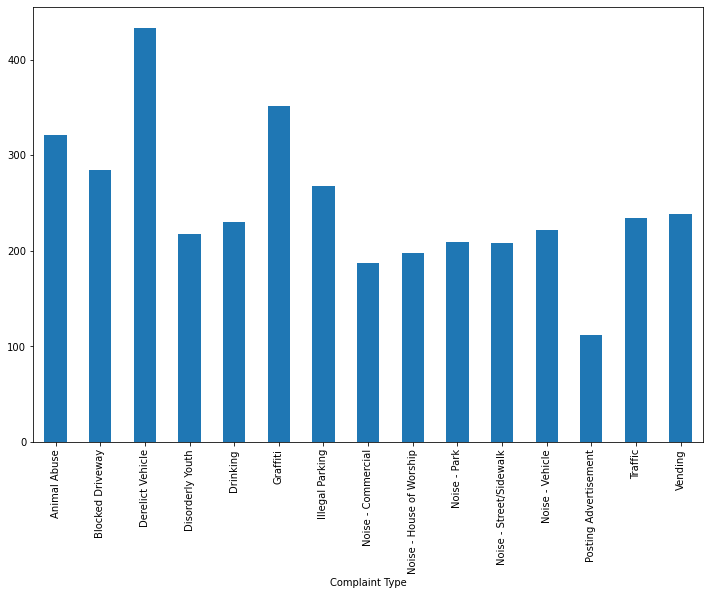

In [21]:
ax = plt.subplot()
nypd_copy.groupby('Complaint Type')['Request_Closing_Time'].mean().plot(kind='bar',
                                                        figsize=(12,8),
                                                        ax=ax)

In [49]:
nypd_copy.groupby('Complaint Type')['Request_Closing_Time'].mean()

Complaint Type
Animal Abuse                321.657499
Blocked Driveway            284.096237
Derelict Vehicle            433.390360
Disorderly Youth            217.075269
Drinking                    230.163690
Graffiti                    351.810526
Illegal Parking             268.250286
Noise - Commercial          187.472970
Noise - House of Worship    197.902299
Noise - Park                209.650394
Noise - Street/Sidewalk     208.555170
Noise - Vehicle             221.685964
Posting Advertisement       111.748792
Traffic                     234.766050
Vending                     238.206600
Name: Request_Closing_Time, dtype: float64

Highest average response time is for Complaint type Derelict vehicles: 433

# Solution2 Observation2

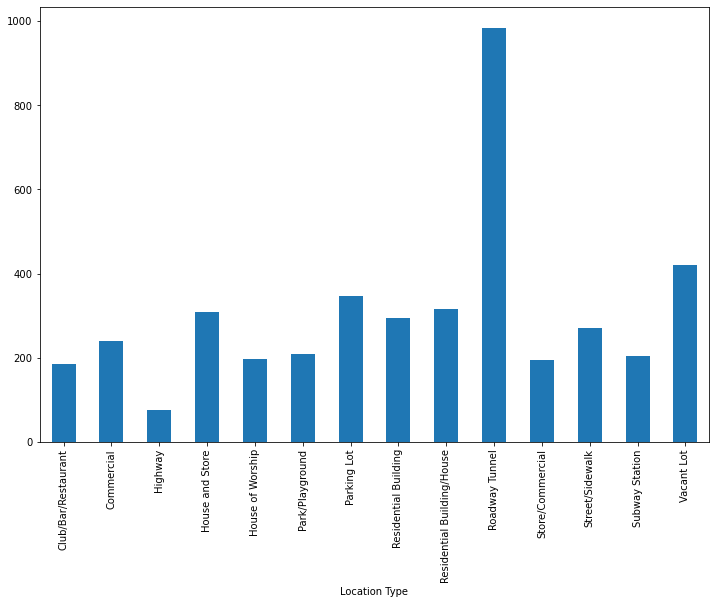

In [42]:
ax = plt.subplot()
nypd_copy.groupby('Location Type')['Request_Closing_Time'].mean().plot(kind='bar',
                                                        figsize=(12,8),
                                                        ax=ax)

In [29]:
nypd_copy.groupby('Location Type')['Request_Closing_Time'].mean().max()

984.75

Highest average response time is for location type Roadway Tunnel: 984

# Solution2 Observation3

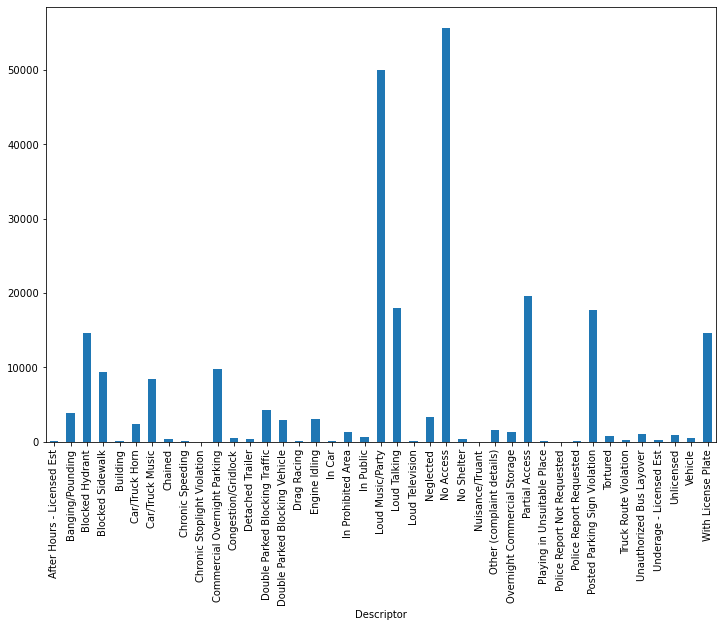

In [40]:
ax = plt.subplot()
nypd_copy.groupby('Descriptor')['Request_Closing_Time'].count().plot(kind='bar',
                                                        figsize=(12,8),
                                                        ax=ax)

In [39]:
nypd_copy.groupby('Descriptor')['Request_Closing_Time'].count().max()

55708

Highest count of complaints is for 'No Access': 55708

# Solution2 Observation4

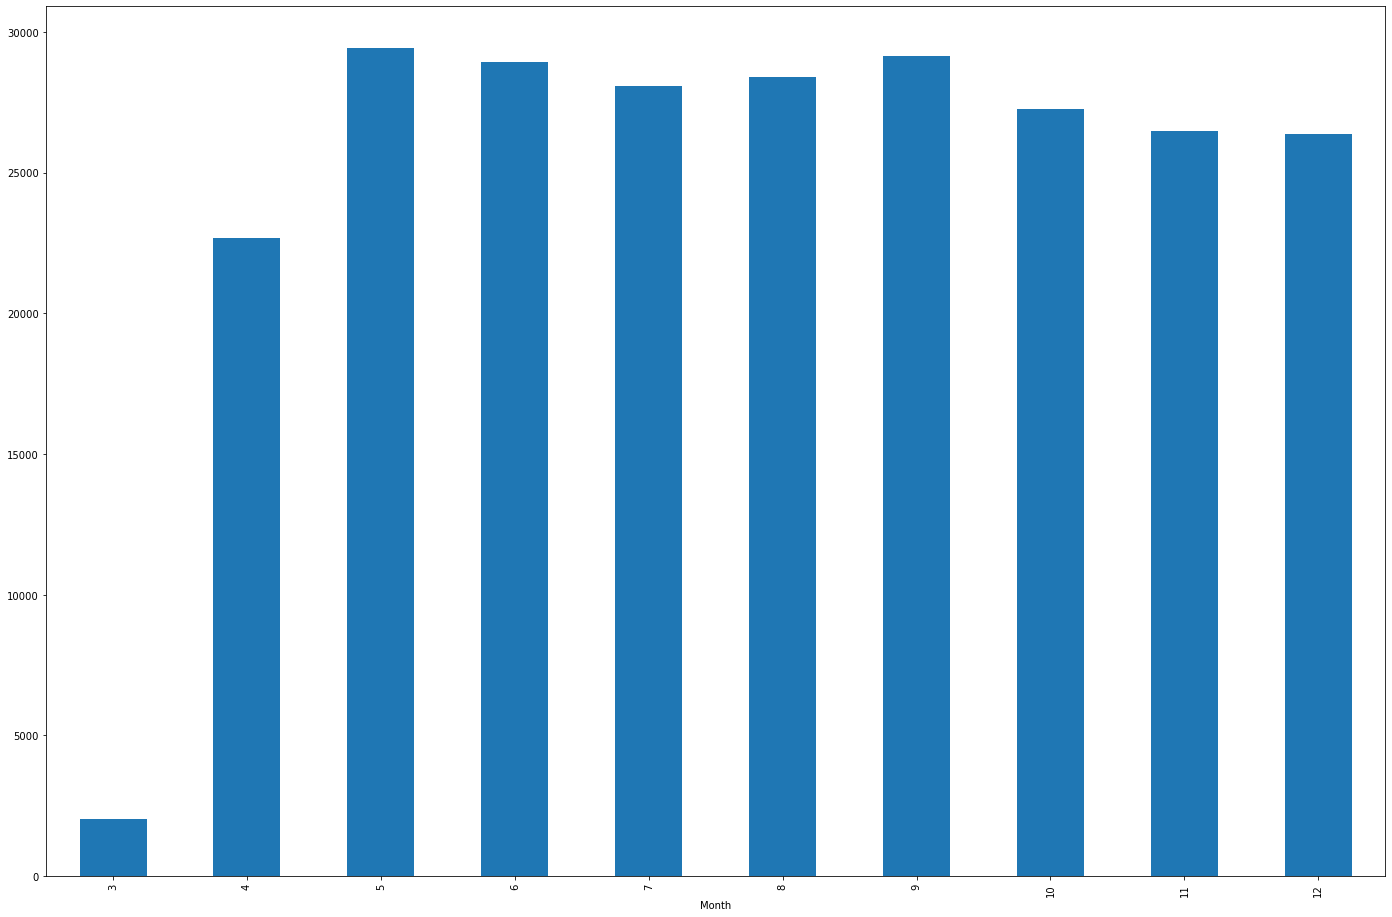

In [36]:
ax = plt.subplot()
nypd_copy.groupby('Month')['Request_Closing_Time'].count().plot(kind='bar',
                                                        figsize=(24,16),
                                                        ax=ax)

In [38]:
nypd_copy.groupby('Month')['Request_Closing_Time'].count().max()

29437

Highest count of complaints are in the month of May: 29437

## Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [52]:
nypd_loacation_complaintType= nypd_copy.groupby(['Location','Complaint Type']).agg({'Request_Closing_Time': 'mean'})

In [56]:
nypd_loacation_complaintType.sort_values(['Request_Closing_Time','Location'])

,,Request_Closing_Time
Location,Complaint Type,
"(40.678429539269835, -73.98361397723242)",Noise - Commercial,2.000000
"(40.69371028050496, -73.95499211670034)",Illegal Parking,2.000000
"(40.71598512070559, -73.9509008064274)",Illegal Parking,2.000000
"(40.76848580086362, -73.91235250532725)",Noise - Vehicle,2.000000
"(40.510211690922475, -74.24398548733994)",Illegal Parking,3.000000
...,...,...
"(40.68349308751147, -73.73091308242111)",Derelict Vehicle,10146.000000
"(40.6449662497121, -73.99499837340035)",Animal Abuse,10485.333333
"(40.65367609466097, -73.95792751148433)",Derelict Vehicle,11556.000000


In [57]:
import scipy.stats as stats
from math import sqrt

## The hypothesis being tested

* __Null hypothesis (H0): the average response time across complaint types is similar__
* __Alternative hypothesis (H1): the average response time across complaint types is NOT similar__

In [59]:
nypd_copy['Complaint Type'].value_counts()

Blocked Driveway            75366
Illegal Parking             61294
Noise - Street/Sidewalk     39451
Noise - Commercial          32334
Derelict Vehicle            14689
Noise - Vehicle             12126
Animal Abuse                 6581
Vending                      2212
Noise - Park                 1270
Drinking                     1008
Traffic                       919
Noise - House of Worship      696
Posting Advertisement         621
Disorderly Youth              186
Graffiti                       95
Name: Complaint Type, dtype: int64

In [61]:
sampledata = nypd_copy[['Complaint Type','Request_Closing_Time']]
sampledata.head()

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,55.0
1,Blocked Driveway,86.0
2,Blocked Driveway,291.0
3,Illegal Parking,465.0
4,Illegal Parking,207.0


In [64]:
sampledata.isna().sum()

Complaint Type          0
Request_Closing_Time    0
dtype: int64

In [67]:
sampledata.groupby('Complaint Type')['Request_Closing_Time'].describe().T

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
count,6581.000000,75366.000000,14689.000000,186.000000,1008.000000,95.000000,61294.000000,32334.00000,696.000000,1270.000000,39451.000000,12126.000000,621.000000,919.000000,2212.000000
mean,321.657499,284.096237,433.390360,217.075269,230.163690,351.810526,268.250286,187.47297,197.902299,209.650394,208.555170,221.685964,111.748792,234.766050,238.206600
std,542.620315,334.974111,639.775973,224.736301,317.060966,330.061061,357.289973,244.08687,284.104625,274.272064,287.567441,283.405559,129.990414,270.421584,276.010758
min,3.000000,2.000000,3.000000,6.000000,4.000000,9.000000,2.000000,1.00000,4.000000,4.000000,2.000000,2.000000,2.000000,6.000000,3.000000
25%,101.000000,96.000000,101.000000,86.250000,70.750000,129.500000,84.000000,57.00000,48.750000,64.000000,62.000000,68.000000,29.000000,57.000000,72.000000
50%,203.000000,190.000000,241.000000,157.000000,152.500000,260.000000,176.000000,124.00000,110.000000,128.000000,134.000000,144.000000,63.000000,145.000000,154.000000
75%,395.000000,357.000000,507.000000,281.750000,294.250000,436.500000,342.000000,239.00000,234.250000,266.000000,262.000000,276.000000,143.000000,316.000000,306.000000
max,31156.000000,8897.000000,13401.000000,1683.000000,5686.000000,1594.000000,34641.000000,7584.00000,2946.000000,3461.000000,8843.000000,8847.000000,934.000000,2366.000000,3862.000000


In [68]:
sampledata['Complaint Type'] = pd.Categorical(sampledata['Complaint Type'])

c:\users\aditya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
sampledata['code'] = sampledata['Complaint Type'].cat.codes

c:\users\aditya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
sampledata.code.unique()

array([10,  1,  6,  2,  7,  8, 12,  0, 14, 11,  4, 13,  9,  5,  3],
      dtype=int8)

In [74]:
sampledata.groupby('code')['Request_Closing_Time'].describe().T

code,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,6581.000000,75366.000000,14689.000000,186.000000,1008.000000,95.000000,61294.000000,32334.00000,696.000000,1270.000000,39451.000000,12126.000000,621.000000,919.000000,2212.000000
mean,321.657499,284.096237,433.390360,217.075269,230.163690,351.810526,268.250286,187.47297,197.902299,209.650394,208.555170,221.685964,111.748792,234.766050,238.206600
std,542.620315,334.974111,639.775973,224.736301,317.060966,330.061061,357.289973,244.08687,284.104625,274.272064,287.567441,283.405559,129.990414,270.421584,276.010758
min,3.000000,2.000000,3.000000,6.000000,4.000000,9.000000,2.000000,1.00000,4.000000,4.000000,2.000000,2.000000,2.000000,6.000000,3.000000
25%,101.000000,96.000000,101.000000,86.250000,70.750000,129.500000,84.000000,57.00000,48.750000,64.000000,62.000000,68.000000,29.000000,57.000000,72.000000
50%,203.000000,190.000000,241.000000,157.000000,152.500000,260.000000,176.000000,124.00000,110.000000,128.000000,134.000000,144.000000,63.000000,145.000000,154.000000
75%,395.000000,357.000000,507.000000,281.750000,294.250000,436.500000,342.000000,239.00000,234.250000,266.000000,262.000000,276.000000,143.000000,316.000000,306.000000
max,31156.000000,8897.000000,13401.000000,1683.000000,5686.000000,1594.000000,34641.000000,7584.00000,2946.000000,3461.000000,8843.000000,8847.000000,934.000000,2366.000000,3862.000000


In [76]:
from scipy import stats
stats.f_oneway(sampledata['Request_Closing_Time'][sampledata['code'] == 0],
               sampledata['Request_Closing_Time'][sampledata['code'] == 1],
               sampledata['Request_Closing_Time'][sampledata['code'] == 2],
              sampledata['Request_Closing_Time'][sampledata['code'] == 3],
               sampledata['Request_Closing_Time'][sampledata['code'] == 4],
               sampledata['Request_Closing_Time'][sampledata['code'] == 5],
              sampledata['Request_Closing_Time'][sampledata['code'] == 6],
               sampledata['Request_Closing_Time'][sampledata['code'] == 7],
               sampledata['Request_Closing_Time'][sampledata['code'] == 8],
              sampledata['Request_Closing_Time'][sampledata['code'] == 9],
               sampledata['Request_Closing_Time'][sampledata['code'] == 10],
               sampledata['Request_Closing_Time'][sampledata['code'] == 11],
              sampledata['Request_Closing_Time'][sampledata['code'] == 12],
               sampledata['Request_Closing_Time'][sampledata['code'] == 13],
               sampledata['Request_Closing_Time'][sampledata['code'] == 14],)

F_onewayResult(statistic=477.2510130458414, pvalue=0.0)

In [77]:
from statsmodels.formula.api import ols 
result = ols('Request_Closing_Time ~ C(code)', data = sampledata).fit()

In [78]:
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     Request_Closing_Time   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                  0.026
Method:                   Least Squares   F-statistic:                     477.3
Date:                  Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                          01:06:35   Log-Likelihood:            -1.8126e+06
No. Observations:                248848   AIC:                         3.625e+06
Df Residuals:                    248833   BIC:                         3.625e+06
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       321.6575  

## As the pvalue is less than 0.05 so we reject null hypothesis and can conclude that average response time is not same.

## The hypothesis being tested

* __Null hypothesis (H0): the type of complaint or service requested and location are independent__
* __Alternative hypothesis (H1):the type of complaint or service requested and location are not independent__


In [79]:
top5_location = nypd_copy['Location'].value_counts()[:5]
top5_location

(40.83036235589997, -73.86602154214397)     901
(40.72195913199264, -73.80969682426189)     505
(40.703818970933284, -73.94207345177706)    476
(40.549093797686275, -74.17363282481907)    311
(40.79770758865914, -73.9401822682408)      295
Name: Location, dtype: int64

In [80]:
top5_location_names = top5_location.index
top5_location_names

Index(['(40.83036235589997, -73.86602154214397)',
       '(40.72195913199264, -73.80969682426189)',
       '(40.703818970933284, -73.94207345177706)',
       '(40.549093797686275, -74.17363282481907)',
       '(40.79770758865914, -73.9401822682408)'],
      dtype='object')

In [82]:
top5_complaints_type = nypd_copy['Complaint Type'].value_counts()[:5]
top5_complaints_type

Blocked Driveway           75366
Illegal Parking            61294
Noise - Street/Sidewalk    39451
Noise - Commercial         32334
Derelict Vehicle           14689
Name: Complaint Type, dtype: int64

In [83]:
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [85]:
sample_data = nypd_copy.loc[(nypd_copy['Complaint Type'].isin(top5_complaints_type_names)) & (nypd_copy['Location'].isin(top5_location_names)), ['Complaint Type', 'Location']]
sample_data.head()

,Complaint Type,Location
385,Illegal Parking,"(40.72195913199264, -73.80969682426189)"
441,Noise - Street/Sidewalk,"(40.83036235589997, -73.86602154214397)"
478,Noise - Commercial,"(40.83036235589997, -73.86602154214397)"
862,Noise - Commercial,"(40.83036235589997, -73.86602154214397)"
1010,Noise - Commercial,"(40.83036235589997, -73.86602154214397)"


In [87]:
pd.crosstab(sample_data['Complaint Type'], sample_data['Location'], margins=True)

Location,"(40.549093797686275, -74.17363282481907)","(40.703818970933284, -73.94207345177706)","(40.72195913199264, -73.80969682426189)","(40.79770758865914, -73.9401822682408)","(40.83036235589997, -73.86602154214397)",All
Complaint Type,,,,,,
Blocked Driveway,1,0,2,0,0,3
Illegal Parking,54,0,503,0,0,557
Noise - Commercial,0,458,0,295,527,1280
Noise - Street/Sidewalk,0,18,0,0,337,355
All,55,476,505,295,864,2195


In [90]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data['Complaint Type'], sample_data['Location']))

In [95]:
print(f"ch^2:{ch2}")
print(f"p-value:{p_value}")

ch^2:2637.1351752488144
p-value:0.0


## As the pvalue is pvalue is less than 0.05 so we reject null hypothesis and conclude that complain type and location are not independent.